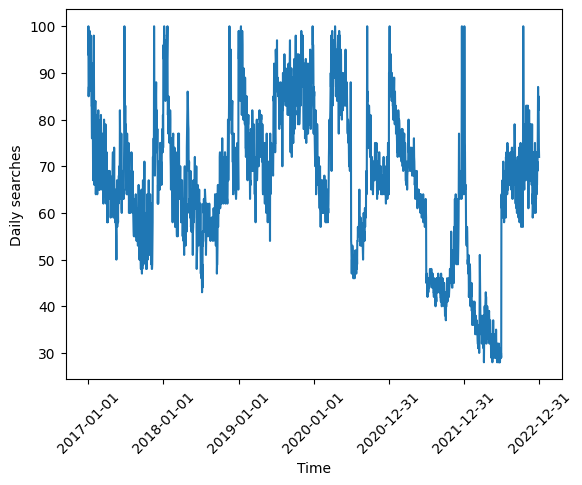

<Figure size 5000x3000 with 0 Axes>

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('/Users/zhenglongwu/Documents/GitHub/MSIN0006/Lab 1 Project/data_source/google_trends_manager/youtube_search.csv')
plt.plot(data['date'], data['searches'])
plt.xticks(data['date'], rotation=45)
plt.locator_params(axis='x', nbins=len(data['date'])/365)
plt.ylabel('Daily searches')
plt.xlabel('Time')
plt.show()